In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def f(x):
    noise_x, noise_y = np.random.random_sample(x.size), np.random.random_sample(x.size)
    for i in range(0, 10):
        if noise_y[i] < 0.5:
            noise_y[i] = (-1) * noise_y[i]
    for j in range(0, 10):
        if noise_x[j] < 0.5:
            noise_x[j] = (-1) * noise_x[j]
    y = x + noise_y
    x = x + noise_x
    return ([x,y])

def gravity_point(vector, n):
    return (np.sum(vector, axis=1) / n)

x = np.array([10, 10, 10, 10, 10, 12, 12, 12, 12, 12])
data = np.array(f(x))
center1 = np.array([10.5, 12])
#center1 = np.random.randint(10, 12) * np.random.rand(2)

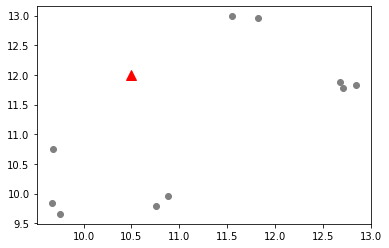

In [3]:
fig, ax = plt.subplots()
ax.scatter(data[0], data[1], c='gray')
ax.plot(center1[0], center1[1], c='r', marker='^', markersize=10)

In [4]:
def distance(vector1, vector2):
    vector = vector1 - vector2
    return (np.dot(vector, np.transpose(vector)))

In [21]:
data = data.transpose()
print(data)

[[ 9.64708271 10.73064942]
 [10.58258848 10.95007588]
 [ 9.81940073 10.51924883]
 [ 9.52209022 10.81306294]
 [ 9.58729993 10.76045817]
 [12.80278391 11.85160064]
 [11.63016131 12.77686328]
 [12.80586105 11.99926388]
 [11.6542416  11.9617909 ]
 [11.76595631 12.76041614]]


In [22]:
d = np.empty((0))
for vector in data:
    d = np.append(d, distance(vector, center1))

In [23]:
s_d = np.sum(d)
prob_d = d / s_d

(0.0, 0.3)

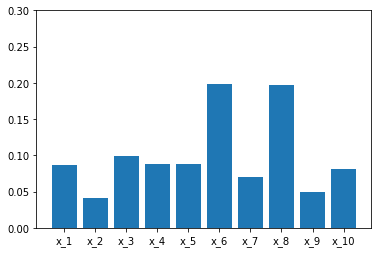

In [24]:
fig, ax = plt.subplots()
x = np.array(["x_1", "x_2", "x_3", "x_4", "x_5", "x_6", "x_7", "x_8", "x_9", "x_10"])
ax.bar(x, prob_d)
ax.set_ylim(bottom=0, top=0.3)

(0.0, 1.0)

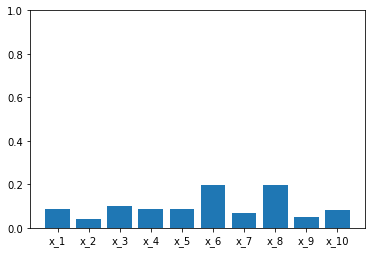

In [33]:
fig, ax = plt.subplots()
x = np.array(["x_1", "x_2", "x_3", "x_4", "x_5", "x_6", "x_7", "x_8", "x_9", "x_10"])
ax.bar(x, prob_d)
ax.set_ylim(bottom=0, top=1)

In [34]:
def softmax(x, S):
    return np.exp(x)/np.exp(S)

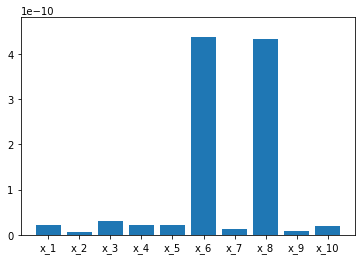

In [41]:
S = np.sum(d)
_d = d.copy()
for i, x in enumerate(d):
    _d[i] = softmax(x, S)
fig, ax = plt.subplots()
x = np.array(["x_1", "x_2", "x_3", "x_4", "x_5", "x_6", "x_7", "x_8", "x_9", "x_10"])
ax.bar(x, _d)
ax.set_ylim(bottom=0, top=_d.max()*1.1)
plt.show()